# ĐỒ ÁN THỰC HÀNH CUỐI KÌ

## MÔN LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU

**Thành viên:**
- Phạm Trần Gia Phú
- Nguyễn Anh Tuấn
- Phạm Khánh Hoàng Việt
- Đinh Thị Hoàng Linh

#### Mô tả dataset
Bạn có bao giờ thắc mắc những thành phần nào có trong mỹ phẩm yêu thích của mình không? 

Bạn có biết rằng có hơn 12.000 hóa chất được sử dụng trong mỹ phẩm và các sản phẩm chăm sóc cá nhân? 

Bộ dữ liệu này chứa thông tin về các hóa chất được sử dụng trong mỹ phẩm, bao gồm tên của hóa chất, công ty sản xuất hóa chất đó, danh mục chính mà hóa chất được sử dụng và ngày báo cáo lần đầu tiên.

Vậy, những gì thực sự trong túi trang điểm của bạn? 
Hãy cùng nhau xem qua một số thành phần của các loại mỹ phẩm phổ biến nhất

#### Cài đặt thư viện

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Phần 1. Khám phá dữ liệu (kết hợp tiền xử lý)

Đọc dữ liệu từ dataset vào dataframe

In [6]:
df = pd.read_csv("./dataset/chemicals-in-cosmetics-3.csv")
df

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114293,114293,41445,JILLSTUART Something Pure Blue Diamond Glaze L...,NaN,NaN,1031,"KOS� America, Inc.",JILL STUART,44,Makeup Products (non-permanent),...,13463-67-7,67901,Titanium dioxide,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114294,114294,41446,JILLSTUART something pure blue my lips,NaN,NaN,1031,"KOS� America, Inc.",JILL STUART,44,Makeup Products (non-permanent),...,13463-67-7,67902,Titanium dioxide,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114295,114295,41449,SPRING BLOSSOM VANILLA APPLE BODY WASH,NaN,NaN,1388,Cosmopharm Ltd.,Careline,6,Bath Products,...,NaN,67905,Cocamide DEA,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114296,114296,41450,Wild Breeze Water Lilies Hand Soap,NaN,NaN,1388,Cosmopharm Ltd.,Careline,6,Bath Products,...,NaN,67906,Cocamide DEA,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1


In [54]:
df.shape

(114298, 23)

- Dữ liệu có 114298 dòng và 23 cột

- Mỗi dòng đại diện cho 1 thông tin của một sản phẩm

<h4> Dữ liệu có các dòng bị lặp không

In [10]:
have_duplicated_rows = False
for i in df.duplicated().items():
    if(i[1] == True):
        have_duplicated_rows = True

if have_duplicated_rows == True:
    print('Dữ liệu có chứa dòng bị lặp !')
else:
    print('Dữ liệu không có chứa dòng bị lặp !')

Dữ liệu không có chứa dòng bị lặp !


**MỖI CỘT CÓ Ý NGHĨA GÌ**

- **CDPHId**: The California Department of Public Health (CDPH) internal identification number for product. Note that the CDPHId may appear more than once if a product has more than one Color/Scent/Flavor, more than one Category, or more than one Chemical Name/CAS number reported. 
- **ProductName**: The name of the product in which the chemical is used. 
- **CSFId**: CDPH internal identification number for a color/scent/flavor. 
- **CSF**: The Cosmetic Safety Factor, a measure of the safety of a chemical used in cosmetics. 
- **CompanyId** : CDPH internal identification number for company.
- **CompanyName**: The name of the company that manufactures the product in which the chemical is used. 
- **BrandName**: The name of the brand of the product in which the chemical is used. 
- **PrimaryCategoryId**: CDPH internal identification number for category.
- **PrimaryCategory**: The primary category of cosmetic in which the chemical is used. 
- **SubCategoryId**: CDPH internal identification number for subcategory.
- **SubCategory**: The subcategory of cosmetic in which the chemical is used. 
- **CASId**: CDPH internal identification number for chemical.
- **CasNumber**: The CAS Number of the chemical. 
- **ChemicalId**: CDPH internal identification number for this chemical's record specific to this product.
- **ChemicalName**: The name of the chemical. 
- **InitialDateReported**: The date the chemical was first reported. 
- **MostRecentDateReported**: The date the chemical was most recently reported. 
- **DiscontinuedDate**: The date the product in which the chemical is used was discontinued. 
- **ChemicalCreatedAt**: The date the chemical was created. 
- **ChemicalUpdatedAt**: The date the chemical was last updated. 
- **ChemicalDateRemoved**: The date the chemical was removed from the product. 
- **ChemicalCount**: The number of chemicals in the product. 

#### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [12]:
df.dtypes

index                       int64
CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object

#### Chuyển các cột  **'InitialDateReported'** , **'MostRecentDateReported'** , **'DiscontinuedDate'** , **'ChemicalCreatedAt'** , **'ChemicalUpdatedAt'** , **'ChemicalDateRemoved'** về dạng datetime

In [13]:
df[['InitialDateReported',
    'MostRecentDateReported',   
    'DiscontinuedDate', 
    'ChemicalCreatedAt',    
    'ChemicalUpdatedAt',    
    'ChemicalDateRemoved']] = pd.to_datetime(df[['InitialDateReported',
                                                'MostRecentDateReported',   
                                                'DiscontinuedDate', 
                                                'ChemicalCreatedAt',    
                                                'ChemicalUpdatedAt',    
                                                'ChemicalDateRemoved']].stack()).unstack()

In [14]:
df[['InitialDateReported',
    'MostRecentDateReported',   
    'DiscontinuedDate', 
    'ChemicalCreatedAt',    
    'ChemicalUpdatedAt',    
    'ChemicalDateRemoved']].dtypes

InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
dtype: object

#### Các cột kiểu dữ liệu Numeric

In [33]:
numberic_cols = df.select_dtypes(include=np.number).columns
numberic_cols

Index(['index', 'CDPHId', 'CSFId', 'CompanyId', 'PrimaryCategoryId',
       'SubCategoryId', 'CasId', 'ChemicalId', 'ChemicalCount'],
      dtype='object')

<h4> Tỉ lệ giá trị thiếu, min max

In [30]:
index = ["missing_values","missing_ratio", "min", "max"]
def missingValues(s):
    temp = s.isna()
    return len(temp[temp==True])
def missingRatio(s):
    temp = s.isna()
    return round((len(temp[temp==True])/len(s))*100,3)

maxValue = []
for i in numberic_cols:
    maxValue.append(df[i].max())

minValue = []
for i in numberic_cols:
    minValue.append(df[i].min())
    
missing_ratio = []
for i in numberic_cols:
    missing_ratio.append(missingRatio(df[i]))

missing_values = []
for i in numberic_cols:
    missing_values.append(missingValues(df[i]))
    
data = [missing_values,missing_ratio,minValue,maxValue]
numberic_col_profiles = pd.DataFrame(data,index,numberic_cols)

In [31]:
numberic_col_profiles

,index,CDPHId,CSFId,CompanyId,PrimaryCategoryId,SubCategoryId,CasId,ChemicalId,ChemicalCount
missing_values,0.0,0.0,33916.000,0.0,0.0,0.0,0.0,0.0,0.0
missing_ratio,0.0,0.0,29.673,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,2.0,1.000,4.0,1.0,3.0,2.0,0.0,0.0
max,114297.0,41451.0,64883.000,1391.0,111.0,172.0,1242.0,67907.0,9.0


#### Kiểm tra dữ liệu null

In [34]:
# tính số giá trị thiếu của cột s
def missing_num(s):
    return s.isnull().sum()

# Tính số tỉ lệ phần trăm giá trị thiếu của cột s 
def missing_ratio(s):
    return s.isnull().sum()/len(s)*100

# Tính số giá trị khác nhau (không tính giá trị thiếu) của cột s
def n_diff_vals(s):
    return s.dropna().unique().size

# Các giá trị khác nhau (không xét giá trị thiếu) của cột s
def diff_vals(s):
    return s.dropna().unique()

# Tên các cột thuộc kiểu dữ liệu dạng phân loại (category)
cate_index = ['ProductName', 'CSF', 'CompanyName', 'BrandName', 'PrimaryCategory',\
            'SubCategory', 'CasNumber', 'ChemicalName']

cate_columns = ['missing_num','missing_ratio', 'n_diff_vals', 'diff_vals']

cate_data = np.array([[
                missing_num(df[i]),
                missing_ratio(df[i]),
                n_diff_vals(df[i]),
                diff_vals(df[i]),
            ] for i in cate_index], dtype = object)

cate_col_profiles_df = pd.DataFrame(data=cate_data, columns=cate_columns, index=cate_index)

In [35]:
cate_col_profiles_df

,missing_num,missing_ratio,n_diff_vals,diff_vals
ProductName,0,0.0,33638,[ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHA...
CSF,34340,30.04427,34258,"[5858-81-1, D&C RED 7 CALCIUM LAKE, D&C RED 28..."
CompanyName,0,0.0,606,"[New Avon LLC, J. Strickland & Co., OPI PRODUC..."
BrandName,216,0.18898,2711,"[AVON, Glover's, OPI, ABSOLUTE, ABSOLUTE FX, G..."
PrimaryCategory,0,0.0,13,"[Makeup Products (non-permanent), Hair Care Pr..."
SubCategory,0,0.0,89,"[Lip Color - Lipsticks, Liners, and Pencils, H..."
CasNumber,6396,5.595898,125,"[13463-67-7, 65996-92-1, 140-67-0, 68603-42-9,..."
ChemicalName,0,0.0,123,"[Titanium dioxide, Distillates (coal tar), Est..."


<br>Số lượng giá trị thiếu (missing_num)
- Có 34340 dòng bị mất giá trị ở cột 'CSF'
- Có 216 dòng bị mất giá trị ở cột 'BrandName'
- Có 6396 dòng bị mất giá trị ở cột 'CasNumber'

<br>Tỉ lệ phần trăm giá trị thiếu (missing_ratio)
- Có 30% dòng bị mất giá trị ở cột 'CSF'
- Có 0.2% dòng bị mất giá trị ở cột 'BrandName'
- Có 5.6% dòng bị mất giá trị ở cột 'CasNumber'


## Phần 2. Trả lời câu hỏi

<h3> Câu 1: Top 10 các loại hoá chất được sử dụng nhiều nhất 

Hẳn là ai cũng muốn biết trong sản phẩm mình sử dụng chứa thành phần chính là gì đúng không? Hãy điểm qua top 10 loại hoá chất được sử dụng nhiều nhất trong mỹ phẩm để xem thử loại hoá chất nào được các nhãn hàng ưa chuộn nhất nhé :D

In [13]:
df['ChemicalName'].value_counts()

Titanium dioxide                                                                                       93252
Silica, crystalline (airborne particles of respirable size)                                             2742
Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.     2154
Mica                                                                                                    1911
Butylated hydroxyanisole                                                                                1888
                                                                                                       ...  
Acetylsalicylic acid                                                                                       1
2-Propyleneacrolein                                                                                        1
Spironolactone                                                                                             1
Extract of coffee b

In [14]:
top10_chems = df['ChemicalName'].value_counts().to_frame('counts').head(10)
top10_chems

,counts
Titanium dioxide,93252
"Silica, crystalline (airborne particles of respirable size)",2742
"Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",2154
Mica,1911
Butylated hydroxyanisole,1888
Carbon black,1753
Talc,1534
Cocamide diethanolamine,1397
Retinyl palmitate,1181
Vitamin A palmitate,971


<AxesSubplot: xlabel='Số lượng sử dụng', ylabel='Loại hoá chất'>

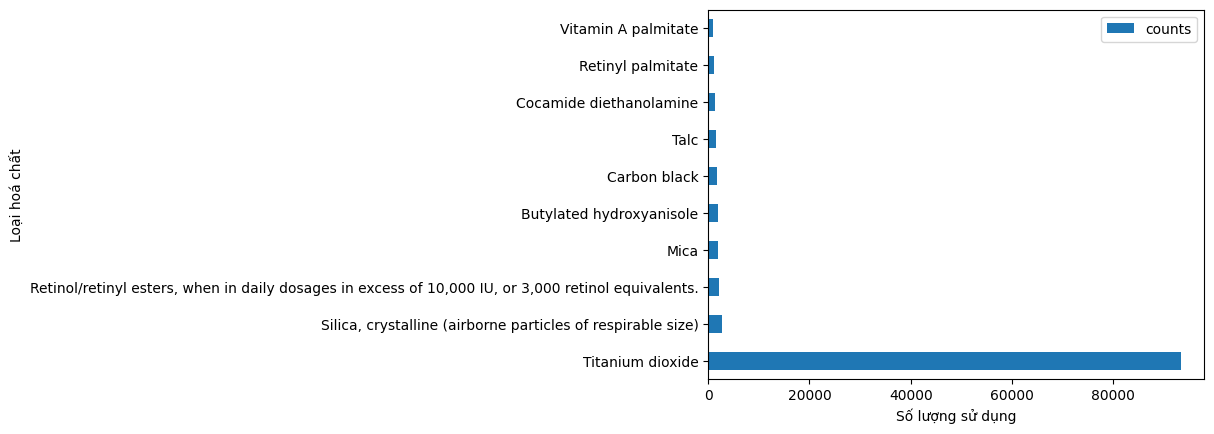

In [16]:
top10_chems.plot.barh(ylabel='Loại hoá chất',xlabel='Số lượng sử dụng')

- Có thể thấy Titanium dioxide được sử dụng rất nhiều, có thể là đa phần trong các loại mỹ phẩm hiện nay.
- Titanium dioxide hay còn gọi là Titania, là một hợp chất tự nhiên. Khi sử dụng trong các sản phẩm mỹ phẩm tại Liên minh Châu u (EU), Titanium dioxide thô sau khi khai thác sẽ được các chuyên gia xử lý và tinh chế cho phù hợp với mục đích sản xuất.
- Là một dạng oxit tự nhiên có trong titan với công thức hóa học là TiO2, Titanium dioxide có nhiều tính chất vật lý bền vững cả về mức độ chịu nhiệt và hóa học, bên cạnh đó chất này còn có độ che phủ lớn và rất dẻo dai.
- Titanium dioxide có dạng bột mịn màu trắng, có độ tương phản cao và có khả năng tạo ra sắc tố trắng sáng nên thường dùng làm nền cho các loại mỹ phẩm.
- Nó có tính hấp thụ, phản xạ hoặc tán xạ ánh sáng (bao gồm cả tia UV từ mặt trời). Vì nó bảo vệ da khỏi cả bức xạ UVA và UVB, Titanium dioxide đã được sử dụng trong kem chống nắng trong nhiều thập kỷ. Và bởi vì nó ít gây kích ứng hơn các hóa chất hấp thụ tia cực tím như oxybenzone, nên nó thường là thành phần hoạt chất trong kem chống nắng cho trẻ sơ sinh và những người có làn da nhạy cảm.


<h3> Câu 2: Top 3 những hóa chất đã được loại bỏ nhiều nhất

Những hóa chất bị loại bỏ có thể do một vài nguyên nhân như có nhiều báo cáo không tốt cho sức khỏe con người hoặc các thành phần đó không tốt cho môi trường, vv.. Những hóa chất như vậy cũng đáng để ta quan tâm.

In [36]:
RemovedChemical_df = df.copy().dropna(subset=['ChemicalDateRemoved'])
RemovedChemical_df = RemovedChemical_df[['ChemicalName', 'ChemicalDateRemoved']]
top_3_removed = RemovedChemical_df.ChemicalName.value_counts(ascending=False).head(3).to_frame('counts')
display(top_3_removed)

,counts
Titanium dioxide,1626
Cocamide diethanolamine,304
"Silica, crystalline (airborne particles of respirable size)",135


Titanium dioxit là một chất phổ biến trong mỹ phẩm như kem chống nắng, kem làm trắng, ... trong các sản phẩm khác như kem đánh răng, màu thực phẩm. Titanium có số lượng sản phẩm loại bỏ ra nhiều nhất vì độ phổ biến cao và nhiều nghiên cứu chỉ ra Titanium dioxit (ở dạng nano) có khả năng tích tụ và gây ra nhiều loại bệnh, trong đó có ung thư.
<br><br>
Cocamide diethanolamine hay Cocamide DEA là thành phần tăng cường khả năng tạo bọt có trong các sản phẩm sữa rửa mặt, dầu gội đầu hay nước rửa tay. Tuy nhiên Cocamide DEA có thể tác dụng với các chất khác tạo ra các chất có hại được gọi là nitrosamine. Cocamide DEA xếp mức 7 trên thang 10 của EWG (trong đó 1 là thấp nhất, 10 là cao nhất về mức độ nguy hiểm)
<br><br>
Silica được sử dụng trong các sản phẩm dưỡng ẩm, kem chống nắng, sửa rửa mặt, vv.. tuy chúng được chứng minh là không gây hại cho sức khỏe nhưng hóa chất này lại gây ô nhiễm môi trường do chúng phải mất 400-500 năm để phân hủy và sự quan tâm đến môi trường của người dùng ngày càng tăng. Vì vậy nhiều công ty đã giảm hoặc ngừng sử dụng hóa chất này trong các sản phẩm của mình.

<h3> Câu 3: Các hãng sản xuất mỹ phẩm có sản phẩm chứa nhiều hóa chất?

Khám phá các hãng mỹ phẩm sử dụng nhiều loại hoá chất cho sản phẩm của mình nhé :v Để biết xem hãng nào có nhiều hoá chất và đưa ra lựa chọn phù hợp

In [37]:
chemical_count = df['ChemicalCount'].value_counts().to_frame('counts').head(10)
chemical_count

,counts
1,87132
2,21133
3,3515
4,1437
0,857
5,105
8,41
7,36
6,33
9,9


Có thể thấy đại đa số các sản phẩm mỹ phẩm có từ 4 chất hóa học trở xuống, với phần lớn trong số đó có thành phần chứa 1 chất hóa học.

Tiếp theo chúng ta sẽ xem thử thông tin của các sản phẩm có từ 5 chất hóa học trở lên, do chúng ta muốn biết những sản phẩm nào có chứa nhiều chất hóa học, và những công ty nào có thói quen sử dụng nhiều chất hóa học trong sản phẩm của mình (để né :v)

In [41]:
# Products with 9 chemicals in its ingredient
df[df['ChemicalCount'] == 9]

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
60819,60819,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,123-91-1,33796,"1,4-Dioxane",2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60820,60820,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,79-06-1,33797,Acrylamide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60821,60821,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,NaN,33798,Arsenic (inorganic arsenic compounds),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60822,60822,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,79-43-6,33799,Dichloroacetic acid,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60823,60823,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-21-8,33800,Ethylene oxide,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60824,60824,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,50-00-0,33801,Formaldehyde (gas),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60825,60825,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,7439-92-1,33802,Lead,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60826,60826,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,NaN,33803,Cocamide diethanolamine (DEA),2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9
60827,60827,22212,Moisturizing Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,107-21-1,33804,Ethylene glycol,2014-02-04,2014-02-04,NaT,2014-02-04,2014-02-04,NaT,9


In [42]:
# Products with 8 chemicals in its ingredient
df[df['ChemicalCount'] == 8]

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
15654,15654,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,123-91-1,6507,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15655,15655,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-07-0,6508,Acetaldehyde,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15656,15656,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,71-43-2,6509,Benzene,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15657,15657,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,100-44-7,6510,Benzyl chloride,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15658,15658,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-21-8,6511,Ethylene oxide,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15659,15659,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-09-2,6512,Dichloromethane (Methylene chloride),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,8
15660,15660,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,62-75-9,6513,N-Nitrosodimethylamine,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15661,15661,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-56-9,6514,Propylene oxide,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-13,8
15662,15662,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,123-91-1,6988,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-13,2014-02-06,NaT,8
15663,15663,3685,Hydrate Conditioner,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-07-0,6989,Acetaldehyde,2009-10-12,2014-02-06,2014-02-06,2009-10-13,2014-02-06,NaT,8


In [43]:
# Products with 7 chemicals in its ingredient
df[df['ChemicalCount'] == 7]

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
15612,15612,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,123-91-1,6479,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15613,15613,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,NaN,6480,Arsenic (inorganic arsenic compounds),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15614,15614,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,79-43-6,6481,Dichloroacetic acid,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15615,15615,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-21-8,6482,Ethylene oxide,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15616,15616,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,50-00-0,6483,Formaldehyde (gas),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15617,15617,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,7439-92-1,6484,Lead,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15618,15618,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,75-09-2,6485,Dichloromethane (Methylene chloride),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,2009-10-12,7
15619,15619,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,123-91-1,6591,"1,4-Dioxane",2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,NaT,7
15620,15620,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,NaN,6592,Arsenic (inorganic arsenic compounds),2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,NaT,7
15621,15621,3671,Hydrate Shampoo,NaN,NaN,165,Regis Corporation,Regis Design Line,18,Hair Care Products (non-coloring),...,79-43-6,6593,Dichloroacetic acid,2009-10-12,2014-02-06,2014-02-06,2009-10-12,2014-02-06,NaT,7


In [44]:
# Products with 6 chemicals in its ingredient
df[df['ChemicalCount'] == 6]

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
111869,111869,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,14807-96-6,66664,Talc,2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111870,111870,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,NaN,66665,"Silica, crystalline (airborne particles of res...",2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111871,111871,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,12001-26-2,66672,Mica,2019-12-30,2020-01-02,NaT,2019-12-31,2019-12-31,NaT,6
111872,111872,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,NaN,66679,"Mineral oils, untreated and mildly treated",2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6
111873,111873,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,90045-36-6,66680,Ginkgo biloba extract,2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6
111874,111874,40753,Sunkissed Highlighter,63448.0,GH01-Soulmate,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,13463-67-7,66681,Titanium dioxide,2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6
111875,111875,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,14807-96-6,66664,Talc,2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111876,111876,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,NaN,66665,"Silica, crystalline (airborne particles of res...",2019-12-30,2020-01-02,NaT,2019-12-30,2019-12-30,NaT,6
111877,111877,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,12001-26-2,66672,Mica,2019-12-30,2020-01-02,NaT,2019-12-31,2019-12-31,NaT,6
111878,111878,40753,Sunkissed Highlighter,63449.0,GH02-Eternal Soul,164,Palladio Beauty Group,Palladio,44,Makeup Products (non-permanent),...,NaN,66679,"Mineral oils, untreated and mildly treated",2019-12-30,2020-01-02,NaT,2020-01-02,2020-01-02,NaT,6


In [45]:
# Products with 5 chemicals in its ingredient
df[df['ChemicalCount'] == 5]

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
2555,2555,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,...,NaN,922,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2556,2556,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,...,NaN,923,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-14,2009-09-21,2009-09-21,5
2557,2557,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,...,NaN,1254,"2,4-Hexadienal (89% trans, trans isomer; 11% c...",2009-09-14,2009-09-18,NaT,2009-09-18,2009-09-18,2009-09-18,5
2558,2558,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,...,79-81-2,1446,"Retinol/retinyl esters, when in daily dosages ...",2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5
2559,2559,862,Best of Skintentions,NaN,NaN,18,Bliss World LLC,Bliss,90,Skin Care Products,...,13463-67-7,1447,Titanium dioxide,2009-09-14,2009-09-18,NaT,2009-09-21,2009-09-21,NaT,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85472,85472,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),...,NaN,50548,"Silica, crystalline (airborne particles of res...",2017-07-19,2017-08-02,NaT,2017-07-19,2017-07-19,NaT,5
85473,85473,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),...,13463-67-7,50549,Titanium dioxide,2017-07-19,2017-08-02,NaT,2017-07-19,2017-07-19,NaT,5
85474,85474,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),...,12001-26-2,50550,Mica,2017-07-19,2017-08-02,NaT,2017-07-19,2017-07-19,NaT,5
85475,85475,31158,MILANI HYPNOTIC LIGHTS POWDER HIGHLIGHTER,47320.0,NaN,1159,MILANI COSMETICS,MILANI,44,Makeup Products (non-permanent),...,13463-67-7,50588,Titanium dioxide,2017-07-19,2017-08-02,NaT,2017-08-02,2017-08-02,NaT,5


In [51]:
df[(df['ChemicalCount'] > 4)]['CompanyName'].value_counts()

Regis Corporation        96
Palladio Beauty Group    64
Bliss World LLC          24
Puritan's Pride          10
Vitamin World, Inc.      10
Cosmopharm Ltd.           9
MILANI COSMETICS          6
Good 'N Natural           5
Name: CompanyName, dtype: int64

Một số điều rút ra từ việc xem xét thông tin các sản phẩm chứa nhiều chất hóa học trong thành phần:
- Hãng 'Regis Corporation' có vẻ rất thích sử dụng hóa chất, các sản phẩm chứa nhiều hóa chất nhất trong dataset này đều do hãng này sản xuất...
- Kế đến chúng ta có hãng 'Palladio Beauty Group', nếu như bảng vàng các sản phẩm chứa từ 7 chất hóa học trở lên bị Regis Corporation độc chiếm thì Palladio Beauty Group cũng chiếm đa số trong các sản phẩm chứa từ 5 tới 6 chất hóa học.
Nói chung là nếu thích sử dụng các loại mỹ phẩm thiên nhiên, thân thiện với môi trường... thì nên né 2 hãng này ra.

<h3>Câu 4: Top 5 Các brand có nhiều sản phẩm nhất

Tìm hiểu top 5 hãng mỹ phẩm có nhiều sản phẩm trên thị trường nhất. Có thể ta sẽ dựa vào đó để tìm kiếm sản phẩm phù hợp

In [52]:
top5_brand = df["BrandName"].value_counts().to_frame("counts").head()
top5_brand

,counts
SEPHORA,3394
NYX,3227
bareMinerals,3158
Revlon,2335
Charlotte Tilbury,2297


<AxesSubplot: xlabel='Tên Nhãn Hàng', ylabel='Số lượng sản phẩm'>

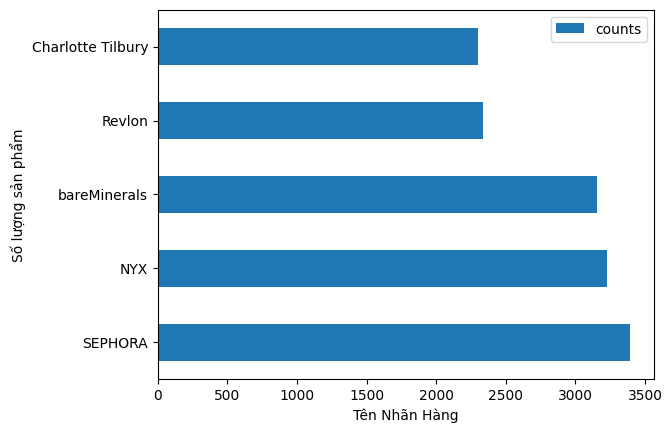

In [53]:
top5_brand.plot.barh(ylabel="Số lượng sản phẩm",xlabel="Tên Nhãn Hàng")

- Đây là 5 nhãn hàng mĩ phẩm có nhiều sản phẩm nhất
- Đứng đầu là **SEPHORA** và thứ 5 là **Charlotte Tilbury**
- Có thể thấy **SEPHORA**, **NYX**, **bareMinerals** là các nhãn hàng có nhiều sản phẩm nhất và chênh lệch số lượng sản phẩm giữa 3 nhãn hàng này là không nhiều.
- **Sephora** là chuỗi cửa hàng mỹ phẩm của Pháp được thành lập vào năm 1969. Với gần 300 nhãn hiệu, cùng với nhãn hiệu cá nhân sở hữu riêng, *Sephora* cung cấp sản phẩm làm đẹp bao gồm đồ trang điểm, dưỡng da, dưỡng thể, nước hoa, sơn móng và dưỡng tóc.
- **NYX Professional Makeup** là một công ty mỹ phẩm của Mỹ là công ty con của L'Oréal. Công ty được thành lập tại Los Angeles bởi Toni Ko vào năm 1999. Nó được đặt theo tên của Nyx, nữ thần bóng đêm của Hy Lạp.
- Thương hiệu mỹ phẩm **bareMinerals** hay còn được biết đến với tên gọi khác là Bare Escentuals được thành lập bởi Leslie Blodgett vào năm 1994, với dòng sản phẩm truyền thống là phấn bột khoáng, là một thương hiệu mỹ phẩm chăm sóc da xuất xứ từ San Francisco, Mỹ.
- Sau top 3 thì có sự chênh lệch khá đáng kể khoảng 800-1000 sản phẩm ở 2 vị trí tiếp theo là **Revlon** và **Charlotte Tilbury**
- **Revlon** là một công ty hóa mỹ phẩm Mỹ được thành lập vào năm 1932.
- **Charlotte Tilbury MBE** được biết đến là chuyên gia trang điểm người Anh nổi tiếng và quen thuộc trong giới ngôi sao Hollywood. Đồng thời, cô cũng kiêm chức Biên tập viên làm đẹp cho tạp chí danh tiếng Vogue Anh và Đại sứ toàn cầu cho các chị em vào ngày Quốc tế Phụ nữ. Năm 2013, Charlotte Tilbury đã ra mắt thương hiệu làm đẹp của riêng mình mang tên **Charlotte Tilbury Beauty Ltd.** tại Selfridges(London).